In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **⛏  how to find missing valu?**

# **Example 1**

In [ ]:
import numpy as np
data = [[1,2,np.nan],
        [3,np.nan,1],
        [5,np.nan,0],
        [np.nan,4,np.nan ],
        [5,0,np.nan],
        [4,5,5]]
arr_data= np.array(data)

miss= np.isnan(arr_data)
print(miss)


[[False False  True]
 [False  True False]
 [False  True False]
 [ True False  True]
 [False False  True]
 [False False False]]


In [ ]:
import pandas as pd
arr_data= pd.DataFrame(arr_data)
arr_data

,0,1,2
0,1.0,2.0,NaN
1,3.0,NaN,1.0
2,5.0,NaN,0.0
3,NaN,4.0,NaN
4,5.0,0.0,NaN
5,4.0,5.0,5.0


In [ ]:
### miss_arr= arr_data.isnull().sum().sort_values(ascending=False)

In [ ]:
miss_arr= arr_data.isnull()
miss_arr

,0,1,2
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,True
4,False,False,True
5,False,False,False


In [ ]:
miss_arr.sum().sort_values(ascending=False)


2    3
1    2
0    1
dtype: int64

# **Example 2: zerooooooos**

In [ ]:
array= ([0,10,2,0],[0,0,4,6],[2,5,7,0],[4,55,0,8])
array= np.array(array)
array

array([[ 0, 10,  2,  0],
       [ 0,  0,  4,  6],
       [ 2,  5,  7,  0],
       [ 4, 55,  0,  8]])

In [ ]:
df_arr= pd.DataFrame(array)
df_arr

,0,1,2,3
0,0,10,2,0
1,0,0,4,6
2,2,5,7,0
3,4,55,0,8


In [ ]:
from numpy import nan
###### Mark zeros as nan
df_arr= df_arr.replace(0, nan)
df_arr

,0,1,2,3
0,NaN,10.0,2.0,NaN
1,NaN,NaN,4.0,6.0
2,2.0,5.0,7.0,NaN
3,4.0,55.0,NaN,8.0


In [ ]:
missing= df_arr.isnull().sum().sort_values(ascending=False)
missing

3    2
0    2
2    1
1    1
dtype: int64

# **Example 3: None**

In [ ]:
aaa= ([1, 2, None],[4,None,None])
aaa=np.array(aaa)
aaa

array([[1, 2, None],
       [4, None, None]], dtype=object)

In [ ]:
df_aaa=pd.DataFrame(aaa)
df_aaa

,0,1,2
0,1,2,None
1,4,None,None


In [ ]:
df_aaa=df_aaa.fillna(np.nan)


df_aaa

,0,1,2
0,1,2.0,NaN
1,4,NaN,NaN


In [ ]:
miss_aaa= df_aaa.isnull().sum().sort_values(ascending=False)
miss_aaa

2    2
1    1
0    0
dtype: int64

# **Example 4:    '-'**

In [ ]:
bbb= ([1, 2, '-'],[4,'-','-'],[33,44,55])
bbb=np.array(bbb)
bbb

array([['1', '2', '-'],
       ['4', '-', '-'],
       ['33', '44', '55']], dtype='<U21')

In [ ]:
df_bbb= pd.DataFrame(bbb)
df_bbb

,0,1,2
0,1,2,-
1,4,-,-
2,33,44,55


In [ ]:
df_bbb= df_bbb.replace('-', nan)
df_bbb

,0,1,2
0,1,2,NaN
1,4,NaN,NaN
2,33,44,55


In [ ]:
miss_bbb= df_bbb.isnull().sum().sort_values(ascending=False)
miss_bbb

2    2
1    1
0    0
dtype: int64

# 🧹  Handing missing values


1.   Dropping
2.   Imputing



# **Example 1**

In [ ]:
df_bbb

,0,1,2
0,1,2,NaN
1,4,NaN,NaN
2,33,44,55


In [ ]:
print(df_bbb.shape)
df_bbb.dropna(inplace=True)
print(df_bbb.shape)
print(df_bbb.isnull().sum().sort_values(ascending=False))


(3, 3)
(1, 3)
2    0
1    0
0    0
dtype: int64


In [ ]:
df_bbb

,0,1,2
2,33,44,55


# **Example 2**

In [ ]:
Arr=([2,3,7,None],[2,5,9,6],[33,3,41,6],[None,50,7,None],[None,None,31,17])
Arr= np.array(Arr)
print(Arr)
df_Arr= pd.DataFrame(Arr)
print(df_Arr)

[[2 3 7 None]
 [2 5 9 6]
 [33 3 41 6]
 [None 50 7 None]
 [None None 31 17]]
      0     1   2     3
0     2     3   7  None
1     2     5   9     6
2    33     3  41     6
3  None    50   7  None
4  None  None  31    17


In [ ]:
df_Arr=df_Arr.fillna(nan)
df_Arr

,0,1,2,3
0,2.0,3.0,7,NaN
1,2.0,5.0,9,6.0
2,33.0,3.0,41,6.0
3,NaN,50.0,7,NaN
4,NaN,NaN,31,17.0


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df_Arr)

modified = imp.transform(df_Arr)
print(modified)


[[ 2.          3.          7.          9.66666667]
 [ 2.          5.          9.          6.        ]
 [33.          3.         41.          6.        ]
 [12.33333333 50.          7.          9.66666667]
 [12.33333333 15.25       31.         17.        ]]


# **Example 3**

In [ ]:
data = [[1,2,0],
        [3,0,1],
        [5,0,0],
        [0,4,6],
        [5,0,0],
        [4,5,5]]
df_data= pd.DataFrame(data)

imputting = SimpleImputer(missing_values=0, strategy='mean')
imputting=imputting.fit(df_data)
df_data= imputting.transform(df_data)

df_data

array([[1.        , 2.        , 4.        ],
       [3.        , 3.66666667, 1.        ],
       [5.        , 3.66666667, 4.        ],
       [3.6       , 4.        , 6.        ],
       [5.        , 3.66666667, 4.        ],
       [4.        , 5.        , 5.        ]])

# **Example 4: Housing Market**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/sklearn/cleaning/Marketting.csv')

In [ ]:
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [ ]:
data.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,30471.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,29480.000000,29480.000000,29480.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30293.000000,30471.000000,3.047100e+04,30471.000000,3.047100e+04,30471.000000,30174.000000,30174.000000,30174.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,3271.272464,4.065111,5354.269699,8324.970739,4.705031,0.109678,1190.738677,1.320895,0.138295,6.635030,2.896393,0.286732,4.200978,8.253454,1.463062e+05,67207.789603,79098.662105,11178.809491,5723.853106,5455.013948,53667.908897,27253.585803,26414.414821,19209.707164,5811.618162,...,765.900619,1283.334756,1024.617808,7.274622,27.782055,30.450297,26.685078,13.320108,4.646516,0.707131,6.122674,12.287979,0.199075,3.876440,20.239310,2.319944,22.769557,10.348669,71.356240,1.401057e+06,30.131863,1.173871e+06,265.528470,765.098467,1278.280635,1021.689513,17.806898,66.195530,73.442421,63.469660,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,2169.759592,2.993795,3989.640917,4289.734174,3.445105,0.333328,1057.015001,1.492903,0.443796,6.571982,3.290058,1.510491,4.741812,23.536953,2.830251e+05,129444.557322,153630.894568,8287.957623,4275.438364,4020.546283,37483.559701,18939.154637,18643.132758,13174.721197,4073.828409,...,224.006719,353.299663,288.163451,18.242400,71.826492,69.528682,70.855732,41.282000,16.884524,2.775499,15.413697,25.785241,0.447815,13.188748,18.843867,2.271539,11.208471,5.668748,155.341362,2.3030

In [ ]:
data.info

<bound method DataFrame.info of           id   timestamp  ...  market_count_5000  price_doc
0          1  2011-08-20  ...                  4    5850000
1          2  2011-08-23  ...                 14    6000000
2          3  2011-08-27  ...                 10    5700000
3          4  2011-09-01  ...                  3   13100000
4          5  2011-09-05  ...                 14   16331452
...      ...         ...  ...                ...        ...
30466  30469  2015-06-30  ...                  6    7400000
30467  30470  2015-06-30  ...                 15   25000000
30468  30471  2015-06-30  ...                  1    6970959
30469  30472  2015-06-30  ...                  7   13500000
30470  30473  2015-06-30  ...                 10    5600000

[30471 rows x 292 columns]>

In [ ]:
data.isnull().sum().sort_values(ascending=False)

hospital_beds_raion           14441
build_year                    13605
state                         13559
cafe_avg_price_500            13281
cafe_sum_500_max_price_avg    13281
                              ...  
office_count_1000                 0
prom_part_1000                    0
green_part_1000                   0
market_count_500                  0
id                                0
Length: 292, dtype: int64

In [ ]:
print(data.shape)
print(data.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [ ]:
# select non numeric columns
data_non_numeric = data.select_dtypes(exclude=[np.number])
data_non_numeric

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,Investment,Otradnoe,no,no,yes,no,yes,no,no,no,no,no,no,no,good
30467,2015-06-30,Investment,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,poor
30468,2015-06-30,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
30469,2015-06-30,Investment,Obruchevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


# **Missing data**
**Technique #1:  Heatmap**


In [ ]:
## When there is a smaller number of features, we can visualize the missing data via heatmap.


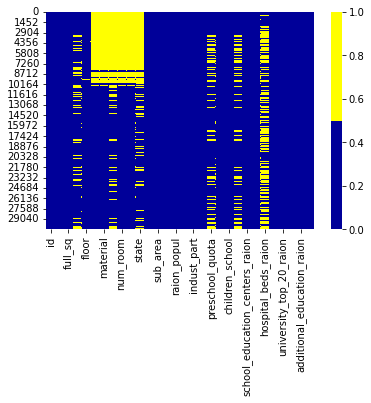

In [ ]:
import seaborn as sns

cols = data.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))


In [ ]:
# or
miss= data.isnull().sum().sort_values(ascending=False)
miss

hospital_beds_raion           14441
build_year                    13605
state                         13559
cafe_avg_price_500            13281
cafe_sum_500_max_price_avg    13281
                              ...  
office_count_1000                 0
prom_part_1000                    0
green_part_1000                   0
market_count_500                  0
id                                0
Length: 292, dtype: int64

In [ ]:
print(data.shape)
print(data.columns)

(30471, 292)
Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)


# **Handling missing values**
*   Dropping rows or columns that have the most nans
*   imputing
*   Disposal


# **Dropping rows that have the most nans**


In [ ]:
# This will keep only rows which have nan's less than 40 in the dataframe, and will remove all having nan's > 40.
df=data
df = df[df.isnull().sum(axis=1)<40]
print(df.shape)

(30281, 292)


# **Dropping columns that have the most nans**

In [ ]:
# This will keep only columns which have nan's less than 1000 in the dataframe, and will remove all having nan's > 1000.
df=df[df.columns[df.isnull().sum() < 1000]]
print(df.shape)

(30281, 254)


In [ ]:
df.isnull().sum().sort_values(ascending=False)

cafe_avg_price_3000            801
cafe_sum_3000_min_price_avg    801
cafe_sum_3000_max_price_avg    801
cafe_sum_5000_min_price_avg    221
cafe_sum_5000_max_price_avg    221
                              ... 
cafe_count_1000_price_4000       0
cafe_count_1000_price_2500       0
cafe_count_1000_price_1500       0
cafe_count_1000_price_1000       0
id                               0
Length: 254, dtype: int64

# **Disposal**

In [ ]:
df=df.drop(['id'], axis=1)
df

,timestamp,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43,4.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,34,3.0,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,43,2.0,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,89,9.0,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,no,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,77,4.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44,7.0,Investment,Otradnoe,1.005305e+07,175518,0.096270,0.300323,9753,4,10311,4,0,1,0,10,3,no,0,9,6,no,yes,no,yes,no,no,no,no,61396,27916,33480,21400,11094,10306,112133,59089,53044,41985,...,647.89,1112.68,880.28,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156

# **imputing**

In [ ]:
# select numeric columns
data_numeric = df.select_dtypes(include=[np.number])
col=data_numeric.columns
col

Index(['full_sq', 'floor', 'area_m', 'raion_popul', 'green_zone_part',
       'indust_part', 'children_preschool',
       'preschool_education_centers_raion', 'children_school',
       'school_education_centers_raion',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=237)

In [ ]:
data_numeric

,full_sq,floor,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,4.0,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,3.0,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,15164,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,2.0,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,7609,17683,5879,3095,2784,6207,3269,2938,14884,7821,7063,19401,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,9.0,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,9083,20446,13087,6645,6442,13670,7126,6544,32063,16513,15550,3292,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,4.0,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,8563,18197,5706,2982,2724,6748,3664,3084,15237,8113,7124,5164,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,7.0,1.005305e+07,175518,0.096270,0.300323,9753,4,10311,4,0,1,0,10,3,0,9,6,61396,27916,33480,21400,11094,10306,112133,59089,53044,41985,12703,29282,9753,5044,4709,10311,5335,4976,23849,12412,11437,11588,...,647.89,1112.68,880.28,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156.08,923.02,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,86,3.0,7.307411e+06,7

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=nan, strategy='mean')
imp = imp.fit(data_numeric)
data_numeric_witout_nan = imp.transform(data_numeric)


In [ ]:
data_numeric_witout_nan

array([[4.30000000e+01, 4.00000000e+00, 6.40757810e+06, ...,
        5.20000000e+01, 4.00000000e+00, 5.85000000e+06],
       [3.40000000e+01, 3.00000000e+00, 9.58933691e+06, ...,
        6.60000000e+01, 1.40000000e+01, 6.00000000e+06],
       [4.30000000e+01, 2.00000000e+00, 4.80826983e+06, ...,
        6.70000000e+01, 1.00000000e+01, 5.70000000e+06],
       ...,
       [4.50000000e+01, 1.00000000e+01, 2.55362968e+07, ...,
        1.10000000e+01, 1.00000000e+00, 6.97095900e+06],
       [6.40000000e+01, 5.00000000e+00, 6.05006457e+06, ...,
        6.50000000e+01, 7.00000000e+00, 1.35000000e+07],
       [4.30000000e+01, 1.00000000e+00, 4.39533278e+06, ...,
        5.40000000e+01, 1.00000000e+01, 5.60000000e+06]])

In [ ]:
data_numeric_witout_nan=pd.DataFrame(data_numeric_witout_nan)
data_numeric_witout_nan

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236
0,43.0,4.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5.0,10309.0,5.0,0.0,1.0,0.0,7.0,3.0,0.0,16.0,1.0,86206.0,40477.0,45729.0,21154.0,11007.0,10147.0,98207.0,52277.0,45930.0,36211.0,10580.0,25631.0,9576.0,4899.0,4677.0,10309.0,5463.0,4846.0,23603.0,12286.0,11317.0,17508.0,...,639.68,1079.37,859.52,5.0,21.0,22.0,16.0,3.0,1.0,0.0,2.0,4.0,0.0,0.0,21.0,1.0,13.09,13.31,29.0,807385.0,52.0,4036616.0,152.0,708.57,1185.71,947.14,12.0,39.0,48.0,40.0,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0
1,34.0,3.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,5.0,7759.0,8.0,0.0,1.0,0.0,6.0,1.0,1.0,3.0,0.0,76284.0,34200.0,42084.0,15727.0,7925.0,7802.0,70194.0,35622.0,34572.0,29431.0,9266.0,20165.0,6880.0,3466.0,3414.0,7759.0,3909.0,3850.0,17700.0,8998.0,8702.0,15164.0,...,631.03,1086.21,858.62,1.0,11.0,11.0,4.0,2.0,1.0,0.0,1.0,7.0,0.0,6.0,19.0,1.0,10.26,27.47,66.0,2690465.0,40.0,2034942.0,177.0,673.81,1148.81,911.31,9.0,49.0,65.0,36.0,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0
2,43.0,2.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,4.0,6207.0,7.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0,1.0,101982.0,46076.0,55906.0,13028.0,6835.0,6193.0,63388.0,31813.0,31575.0,25292.0,7609.0,17683.0,5879.0,3095.0,2784.0,6207.0,3269.0,2938.0,14884.0,7821.0,7063.0,19401.0,...,697.44,1192.31,944.87,2.0,9.0,17.0,9.0,3.0,1.0,0.0,0.0,11.0,0.0,0.0,20.0,6.0,13.69,21.58,43.0,1478160.0,35.0,1572990.0,122.0,702.68,1196.43,949.55,10.0,29.0,45.0,25.0,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0
3,89.0,9.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,9.0,13670.0,10.0,0.0,1.0,0.0,17.0,6.0,0.0,11.0,4.0,21155.0,9828.0,11327.0,28563.0,14680.0,13883.0,120381.0,60040.0,60341.0,29529.0,9083.0,20446.0,13087.0,6645.0,6442.0,13670.0,7126.0,6544.0,32063.0,16513.0,15550.0,3292.0,...,718.75,1218.75,968.75,0.0,5.0,14.0,10.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,18.0,3.0,14.18,3.89,8.0,244166.0,22.0,942180.0,61.0,931.58,1552.63,1242.11,4.0,7.0,21.0,15.0,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0
4,77.0,4.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,7.0,6748.0,9.0,0.0,4.0,2.0,25.0,2.0,0.0,10.0,93.0,28179.0,13522.0,14657.0,13368.0,7159.0,6209.0,68043.0,34236.0,33807.0,26760.0,8563.0,18197.0,5706.0,2982.0,2724.0,6748.0,3664.0,3084.0,15237.0,8113.0,7124.0,5164.0,...,853.03,1410.45,1131.74,63.0,266.0,267.0,262.0,149.0,57.0,4.0,70.0,121.0,1.0,40.0,77.0,5.0,8.38,10.92,689.0,8404624.0,114.0,3503058.0,2283.0,853.88,1411.45,1132.66,143.0,566.0,578.0,552.0,319.0,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30276,44.0,7.0,1.005305e+07,175518.0,0.096270,0.300323,9753.0,4.0,10311.0,4.0,0.0,1.0,0.0,10.0,3.0,0.0,9.0,6.0,61396.0,27916.0,33480.0,21400.0,11094.0,10306.0,112133.0,59089.0,53044.0,41985.0,12703.0,29282.0,9753.0,5044.0,4709.0,10311.0,5335.0,4976.0,23849.0,12412.0,11437.0,11588.0,...,647.89,1112.68,880.28,8.0,20.0,30.0,15.0,5.0,1.0,0.0,5.0,12.0,1.0,0.0,29.0,3.0,15.52,17.24,44.0,838601.0,53.0,2548292.0,207.0,689.95,1156.08,923.02,18.0,63.0,59.0,47.0,15.0,5.0,0.0,15.0,26.0,1.0,2.0,84.0,6.0,7400000.0
30277,86.0,3.0,7.307411e+06,75377.0,0.065444,0.000078,4237.0,4.0,6398.0,4.0,1.0,3.0,2.0,29.0,16.0,10.0,23.0,141.0,116742.0,52836.0,63906.0,11272.0,5470.0,5802.0,43921.0,21901.0,22020.0,20184.0,6644.0,13540.0,4237.0,2079.0,2158.0,6398.0,3094.0,3304.0,12508.0,6065.0,6443.0,23480.0,...,895.84,1476.65,1186.24,54.0,268.0,258.0,230.0,155.0,57.0,17.0,35.0,62.0,1.0,48.0,80.0,4.0,8.29,12.85,617.0,9

In [ ]:
data_numeric_witout_nan.columns=data_numeric.columns


,full_sq,floor,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43.0,4.0,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5.0,10309.0,5.0,0.0,1.0,0.0,7.0,3.0,0.0,16.0,1.0,86206.0,40477.0,45729.0,21154.0,11007.0,10147.0,98207.0,52277.0,45930.0,36211.0,10580.0,25631.0,9576.0,4899.0,4677.0,10309.0,5463.0,4846.0,23603.0,12286.0,11317.0,17508.0,...,639.68,1079.37,859.52,5.0,21.0,22.0,16.0,3.0,1.0,0.0,2.0,4.0,0.0,0.0,21.0,1.0,13.09,13.31,29.0,807385.0,52.0,4036616.0,152.0,708.57,1185.71,947.14,12.0,39.0,48.0,40.0,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0
1,34.0,3.0,9.589337e+06,115352.0,0.372602,0.049637,6880.0,5.0,7759.0,8.0,0.0,1.0,0.0,6.0,1.0,1.0,3.0,0.0,76284.0,34200.0,42084.0,15727.0,7925.0,7802.0,70194.0,35622.0,34572.0,29431.0,9266.0,20165.0,6880.0,3466.0,3414.0,7759.0,3909.0,3850.0,17700.0,8998.0,8702.0,15164.0,...,631.03,1086.21,858.62,1.0,11.0,11.0,4.0,2.0,1.0,0.0,1.0,7.0,0.0,6.0,19.0,1.0,10.26,27.47,66.0,2690465.0,40.0,2034942.0,177.0,673.81,1148.81,911.31,9.0,49.0,65.0,36.0,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0
2,43.0,2.0,4.808270e+06,101708.0,0.112560,0.118537,5879.0,4.0,6207.0,7.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0,1.0,101982.0,46076.0,55906.0,13028.0,6835.0,6193.0,63388.0,31813.0,31575.0,25292.0,7609.0,17683.0,5879.0,3095.0,2784.0,6207.0,3269.0,2938.0,14884.0,7821.0,7063.0,19401.0,...,697.44,1192.31,944.87,2.0,9.0,17.0,9.0,3.0,1.0,0.0,0.0,11.0,0.0,0.0,20.0,6.0,13.69,21.58,43.0,1478160.0,35.0,1572990.0,122.0,702.68,1196.43,949.55,10.0,29.0,45.0,25.0,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0
3,89.0,9.0,1.258354e+07,178473.0,0.194703,0.069753,13087.0,9.0,13670.0,10.0,0.0,1.0,0.0,17.0,6.0,0.0,11.0,4.0,21155.0,9828.0,11327.0,28563.0,14680.0,13883.0,120381.0,60040.0,60341.0,29529.0,9083.0,20446.0,13087.0,6645.0,6442.0,13670.0,7126.0,6544.0,32063.0,16513.0,15550.0,3292.0,...,718.75,1218.75,968.75,0.0,5.0,14.0,10.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,18.0,3.0,14.18,3.89,8.0,244166.0,22.0,942180.0,61.0,931.58,1552.63,1242.11,4.0,7.0,21.0,15.0,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0
4,77.0,4.0,8.398461e+06,108171.0,0.015234,0.037316,5706.0,7.0,6748.0,9.0,0.0,4.0,2.0,25.0,2.0,0.0,10.0,93.0,28179.0,13522.0,14657.0,13368.0,7159.0,6209.0,68043.0,34236.0,33807.0,26760.0,8563.0,18197.0,5706.0,2982.0,2724.0,6748.0,3664.0,3084.0,15237.0,8113.0,7124.0,5164.0,...,853.03,1410.45,1131.74,63.0,266.0,267.0,262.0,149.0,57.0,4.0,70.0,121.0,1.0,40.0,77.0,5.0,8.38,10.92,689.0,8404624.0,114.0,3503058.0,2283.0,853.88,1411.45,1132.66,143.0,566.0,578.0,552.0,319.0,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0
...,...,...,...,...,...,...,...,...,...,...,